# Hilda Beltrán Acosta

### A01251916

### Workshop 4

### August 29th, 2023

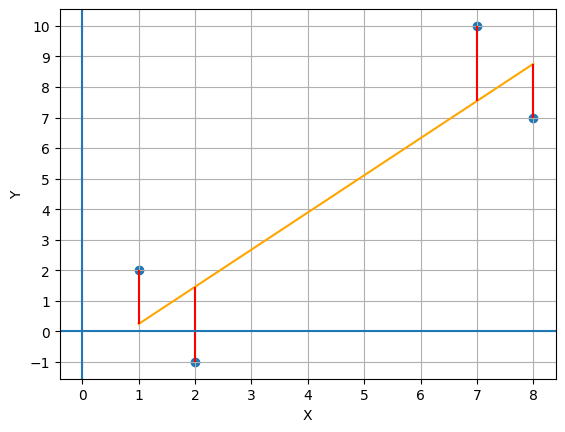

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Create dictionary with data from 4 observations
data = {'x':  [1,2,7,8],
        'y': [2,-1,10,7]}
# Convert it to DataFrame
df = pd.DataFrame(data)
# Get the coefficients of a line that fits this 4 points
b1,b0 = np.polyfit(df.x,df.y,1)
# Calculate predicted y with the coefficients calculated before
df['yhat'] = b0 + b1*df['x']

# Clean the figure before plotting
plt.clf()
# Scatter plot with original points
plt.scatter(df.x,df.y)
# Plot of the fitted line
plt.plot(df.x, df.yhat,c="orange")
plt.xticks(np.arange(-4,14,1))
plt.yticks(np.arange(-2,11,1))

# Plot the distance between the fitted line and the points (the error)
for i in range(4):
  x=df.x.iloc[i]
  ymin= df.y.iloc[i]
  ymax=df.yhat.iloc[i]
  if (ymin>ymax):
    temp=ymax
    ymax=ymin
    ymin=temp
  plt.vlines(x=x,ymin=ymin,ymax=ymax,color='r')

# Plot a horizontal and vertical linea that parts from the origin
plt.axhline(y=0)
plt.axvline(x=0)

# Add labels
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

Text(0.5, 0, 'sum sq.errors')

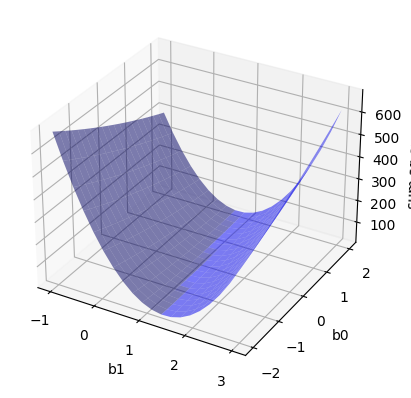

In [2]:
# Import necessary libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

# This function calculates the sum of the squared errors between the actual y value and the predicted value
def sumsqerrors2(b1, b0,df):
    return sum( ( df.y - (b0+b1*df.x)) **2)

# Create the plot with a subplot in it
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

# Linspace provides an easy way of creating an array of 20 possible values
# In this case beta1 will stay between -1 and 3, while beta0 will stay between
# -2 and 2.
b1s = np.linspace(-1, 3.0, 20)
b0s = np.linspace(-2, 2, 20)

# Create grid with all of betas1 and betas0 possible combinations
# It stores them as two values, M and B
M, B = np.meshgrid(b1s, b0s)

# for each combination of values of beta1 and beta0 we calculate the sum of the
# errors squared
zs = np.array([sumsqerrors2(mp, bp, df)
        for mp, bp in zip(np.ravel(M), np.ravel(B))])

# I reshape the zs (squared errors) from a vector to a grid of the same size as M (20x20)
Z = zs.reshape(M.shape)

# Plot the result
ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.5)

ax.set_xlabel('b1')
ax.set_ylabel('b0')
ax.set_zlabel('sum sq.errors')

# plt.show()

In [3]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Download data with yahoo finance, from Alfa and the Mexican Market per month
sprices = yf.download(['ALFAA.MX','^MXX'],start="2018-01-01", end="2022-07-31",interval="1mo")
# Get just the Adj Close column
sprices = sprices['Adj Close']

# Calculating cc returns for both stocks
sr = np.log(sprices) - np.log(sprices.shift(1))

# Drop NaN's from the first month's data, since we can't calculate the return for
# the first period
sr=sr.dropna()
sr.columns=['ALFAAret','MXXret']

[*********************100%%**********************]  2 of 2 completed


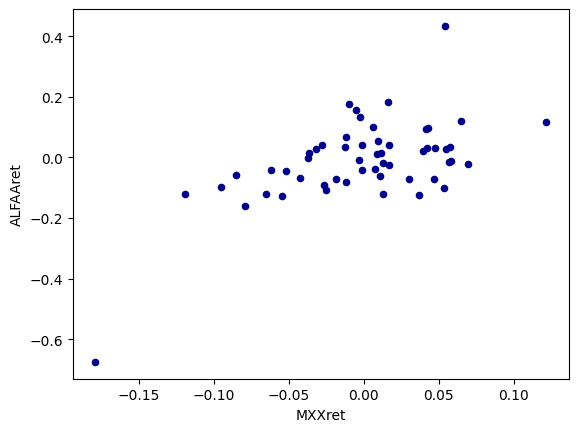

In [4]:
# Plot a scatter plot with the information from both stocks
sr.plot.scatter(x='MXXret', y='ALFAAret',c='DarkBlue')
plt.show()

KNOWING OUR X VARIABLE IS THE RETURNS FROM THE MEXICAN MARKET AND OUR Y VARIABLE IS THE ALFA'S RETURNS, WE CAN SEE THERE'S A POINT IN WHICH ALFA'S RETURNS ARE OVER THE -60%. MOST OF THE RETURNS FROM ALFA ARE LOCATED BETWEEN THE -20% AND THE 20%; ON THE OTHER HAND, MEXICAN'S MARKET RETURNS ARE GROUPED BETWEEN A SMALLER RANGE OF VALUES, GOING FROM ~-19% TO ~14%.

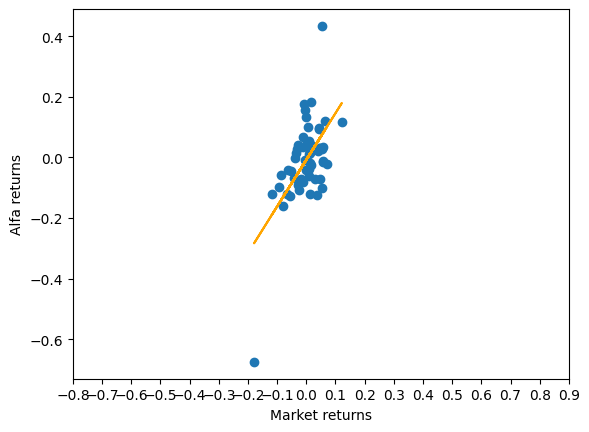

In [5]:
# Clean figure before plotting
plt.clf()

# Define our independent variable, which is the cc returns from the Mexican Market
x=sr['MXXret']
# Define out dependent variable, which is the cc returns from Alfa
y = sr['ALFAAret']
# Draw a scatter plot with this information
plt.scatter(x, y)


# With the function polyfit we obtain the coefficients for a linear regression
# with the variables specified, in this case x and y defined previously
b1,b0 = np.polyfit(x,y,1)

# Calculate the predicted line and plot it
yfit = b0+b1*x
plt.plot(x, yfit,c="orange")
plt.xticks(np.arange(-0.80,1,0.1))

# Add labels
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

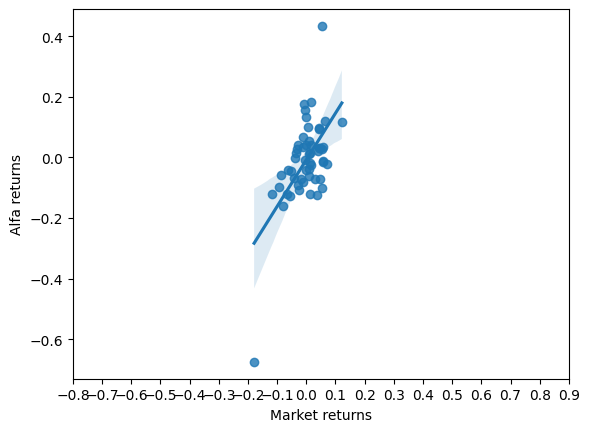

In [6]:
# Using the seaborn library is easier to plot the scatter plot and the regression line
import seaborn as sns
plt.clf()
sns.regplot(x = x, y = y)
plt.xticks(np.arange(-0.80,1,0.1))
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

In [7]:
# Import necessary library
import statsmodels.api as sm
# It's necessary to add a column filled with 1's to include the beta1 in the model
X = sm.add_constant(x)

# OLS regression model
mkmodel = sm.OLS(y,X).fit()

# Display information of the estimated model
# There's useful information such as the R^2, beta1 and beta0, standard error,
# t-statistic, p-value, and the 95% confidence interval.
print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:               ALFAAret   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     28.13
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           2.36e-06
Time:                        03:54:01   Log-Likelihood:                 42.633
No. Observations:                  54   AIC:                            -81.27
Df Residuals:                      52   BIC:                            -77.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0080      0.015     -0.522      0.6

In [9]:
# There's a specific OLS function that we can use, the difference between these two
# functions is that this one doesn't need to have the extra columns of 1's for the
# intercept.
import statsmodels.formula.api as smf

mkmodel2 = smf.ols('ALFAAret ~ MXXret',data=sr).fit()
print(mkmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:               ALFAAret   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     28.13
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           2.36e-06
Time:                        03:55:15   Log-Likelihood:                 42.633
No. Observations:                  54   AIC:                            -81.27
Df Residuals:                      52   BIC:                            -77.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0080      0.015     -0.522      0.6

In [10]:
# Using matrix algebra to estimate the beta coefficients:
# I add the column of 1's to the dataframe:
sr['constant'] = 1
selcols = ['constant','MXXret']
# I set x as a matrix with the column of 1's and the values of X:
x = sr[selcols].values
# I set y as the dependent variable:
y = sr['ALFAAret'].values
# I calculate the matrix multiplication X'X:
xtx = np.matmul(x.transpose(),x)
# I calculate the matrix multiplication X'Y:
xty = np.matmul(x.transpose(),y)
# I get the inverse of the matrix (X'X) to solve for the beta coefficients:
invtxt = np.linalg.inv(xtx)
# I multiply inv(X'X)*X'Y to get the estimation of the beta vector (beta0 and beta1 coefficients)
betas = np.matmul(invtxt,xty)
betas

array([-0.00795217,  1.53870387])

In [11]:
# Getting price data and selecting adjusted price columns:
sprices = yf.download(['ALFAA.MX','^MXX'],start="2010-01-01", end="2022-07-31",interval="1mo")
sprices = sprices['Adj Close']

# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()
sr.columns=['ALFAAret','MXXret']

[*********************100%%**********************]  2 of 2 completed


In [12]:
# Import the necessary libraries
from statsmodels.regression.rolling import RollingOLS

# Rolling OLS regression does the same over a window or period of time set as a
# parameter, this window moves among the data set to understand changing
# relationships over a period of time.
x=sm.add_constant(sr['MXXret'])
y = sr['ALFAAret']
rolreg = RollingOLS(y,x,window=36).fit()
betas = rolreg.params
# I check the last pairs of beta values:
betas.tail()

,const,MXXret
Date,,
2022-03-01,-0.022426,1.877835
2022-04-01,-0.016308,1.803981
2022-05-01,-0.014117,1.816946
2022-06-01,-0.012129,1.720952
2022-07-01,-0.012282,1.706228


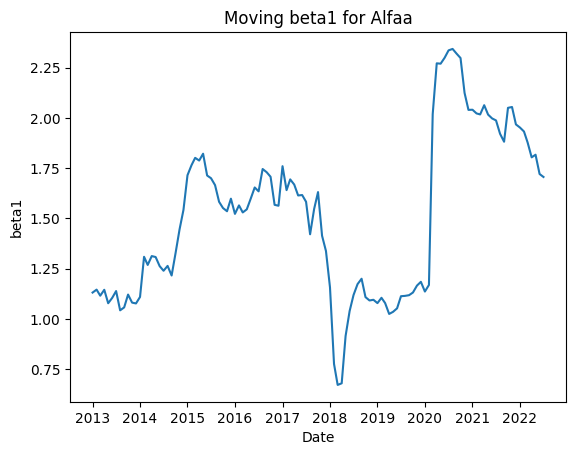

In [13]:
# We analyze the values for bet1 among this period of time
plt.clf()
plt.plot(betas['MXXret'])
plt.title('Moving beta1 for Alfaa')
plt.xlabel('Date')
plt.ylabel('beta1')
plt.show()

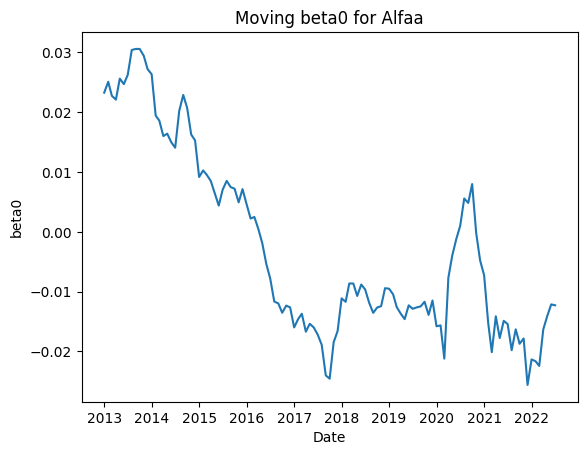

In [14]:
# We analyze the values for beta0 among this period of time
plt.clf()
plt.plot(betas['const'])
plt.title('Moving beta0 for Alfaa')
plt.xlabel('Date')
plt.ylabel('beta0')
plt.show()

AFTER ANALYZING THIS GRAPHS WE CAN SEE THAT IN FACT, BETA1 AND BETA0 ARE NOT VALUES THAT STAY CONSTANT OVER TIME. I CAN'T SEE A CLEAR PATTERN TO MAKE AN INTERPRETATION OF HOW THIS WILL IMPACT THE PREDICTIONS, BUT IT'S CLEAR HOW IT'S IN CONSTAN CHANGE.

In [15]:
# Get statistic information from our data
betas.describe()

,const,MXXret
count,115.000000,115.000000
mean,-0.002615,1.513428
std,0.015600,0.402208
min,-0.025598,0.671151
25%,-0.014346,1.133487
50%,-0.009506,1.546796
75%,0.008243,1.794689
max,0.030594,2.343574


WE CAN SEE THERE'S A CLEAR CHANGE BETWEEN THE FIRST AND THE SECOND REGRESSION, THE CONSTANT AND THE ROLLING REGRESSIONS. THERE'S A BIG DIFFERENCE BETWEEN THE MEANS, THE STANDARD DEVIATIONS, ETC. EVEN THOUGH THERE ARE BIG DIFFERENCES, WE CAN'T MAKE A CLEAR HYPOTHESIS ABOUT THE IMPACT IT HAS ON USING ONE OR THE OTHER METHOD, SINCE OUR DATA IS FROM REALLY DIFFERENT PERIODS OF TIME.